In [100]:
import pandas as pd
import sklearn
import numpy as np
import tensorflow as tf

all_scores = []

In [101]:
df = pd.read_csv("mammographic_masses.data.txt", header=None)
df.columns=["BI_RADS", "age", "shape", "margin", "density", "severity"]
df

,BI_RADS,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


In [102]:
df = df.replace("?", np.nan)
df

,BI_RADS,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,NaN,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,NaN,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


In [103]:
params = df['density'].isnull() | df['margin'].isnull() | df['density'].isnull() | df['severity'].isnull()
dl = df[params]
dl

,BI_RADS,age,shape,margin,density,severity
1,4,43,1,1,NaN,1
4,5,74,1,5,NaN,1
5,4,65,1,NaN,3,0
6,4,70,NaN,NaN,3,0
7,5,42,1,NaN,3,0
...,...,...,...,...,...,...
691,4,72,3,NaN,3,0
723,4,60,3,NaN,4,0
745,6,76,3,NaN,3,0
752,5,48,NaN,4,NaN,1


In [104]:
df = df.dropna().astype(np.float)
df.reset_index(drop=True, inplace=True)
df

,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1.0
1,5.0,58.0,4.0,5.0,3.0,1.0
2,4.0,28.0,1.0,1.0,3.0,0.0
3,5.0,57.0,1.0,5.0,3.0,1.0
4,5.0,76.0,1.0,4.0,3.0,1.0
...,...,...,...,...,...,...
825,4.0,47.0,2.0,1.0,3.0,0.0
826,4.0,56.0,4.0,5.0,3.0,1.0
827,4.0,64.0,4.0,5.0,3.0,0.0
828,5.0,66.0,4.0,5.0,3.0,1.0


In [105]:
X = np.array(df[["age", "shape", "margin", "density"]])
y = np.array(df['severity'])
labels = ['positive', 'negative']

In [106]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

In [107]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.25)

In [108]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(trainX, trainY)
clf.score(testX, testY)

0.7836538461538461

In [41]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn import tree
import pydotplus

dot = tree.export_graphviz(clf, out_file=None, feature_names=["age", "shape", "margin", "density"])
graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [109]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=10)
print(scores.mean())
all_scores.append(["tree", scores.mean()])
scores

0.7421469851531561


array([0.71428571, 0.78571429, 0.76190476, 0.73493976, 0.77108434,
       0.68674699, 0.72289157, 0.76829268, 0.76829268, 0.70731707])

In [110]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, class_weight='balanced')
scores = cross_val_score(clf, X, y, cv=10)
all_scores.append(["forest", scores.mean()])
print(scores.mean())
scores

0.7588850174216029


array([0.72619048, 0.80952381, 0.82142857, 0.74698795, 0.79518072,
       0.6746988 , 0.78313253, 0.75609756, 0.80487805, 0.67073171])

In [111]:
from sklearn import svm

clf = svm.SVC(kernel="linear")
scores = cross_val_score(clf, X, y, cv=10)
all_scores.append(["svm", scores.mean()])
print(scores.mean())
scores

0.7964988875362076


array([0.71428571, 0.77380952, 0.86904762, 0.80722892, 0.84337349,
       0.69879518, 0.80722892, 0.80487805, 0.90243902, 0.74390244])

In [112]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(clf, X, y, cv=10)
all_scores.append(["knn", scores.mean()])
print(scores.mean())
scores

0.7854795488574507


array([0.77380952, 0.76190476, 0.83333333, 0.74698795, 0.87951807,
       0.72289157, 0.81927711, 0.79268293, 0.81707317, 0.70731707])

In [46]:
best_K = [0, 0]

for i in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(clf, X, y, cv=10)
    
    if scores.mean() > best_K[1]:
        best_K = [i, scores.mean()]
        
    print(scores.mean())
    
print(f'\n\n BEST K FOR: {best_K[0]}, {best_K[1]}')

0.7239123742356184
0.6889838098036746
0.7541080699103032
0.7300813008130081
0.7735464506108056
0.7626163189342738
0.7940595133145824
0.7747082406280172
0.7880200243482641
0.7854795488574507
0.7915333809104012
0.7794257168045002
0.7819084701174035
0.7915039950743742
0.7878748443250353
0.7794411093852764
0.7818073688482151
0.775681121699341
0.7805147418944068
0.7828666582707136
0.7853927906748946
0.7817342540895289
0.7805588206484475
0.780587506821712
0.7878171221471251
0.7866269957880302
0.7854365195975539
0.7902271105327232
0.7865979597833844
0.7878314652337574
0.7914172368918182
0.7878314652337574
0.7865976099520032
0.7866119530386354
0.7866262961252677
0.7854358199347914
0.7866843681345592
0.7866553321299133
0.7878891874116676
0.7854791990260694
0.7854645061080558
0.7818500482767305
0.7830692106404713
0.783054867553839
0.783054867553839
0.7854648559394373
0.7866843681345591
0.7890653205155116
0.7902995256286471


 BEST K FOR: 7, 0.7940595133145824


In [113]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

clf = MultinomialNB()
scalar = MinMaxScaler()
minmax_X = scalar.fit_transform(X)
scores = cross_val_score(clf, minmax_X, y, cv=10)
all_scores.append(["naive bayes", scores.mean()])
print(scores.mean())
scores

0.7844055665169388


array([0.73809524, 0.76190476, 0.82142857, 0.8313253 , 0.8313253 ,
       0.73493976, 0.74698795, 0.76829268, 0.91463415, 0.69512195])

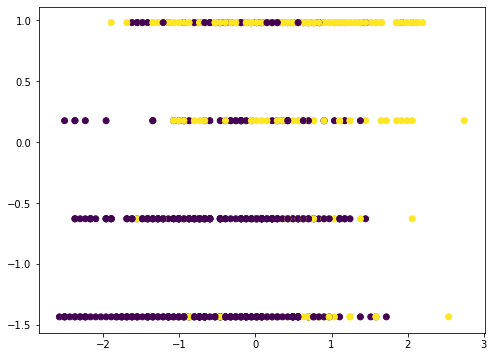

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

In [116]:
import warnings; warnings.simplefilter('ignore')

kernels = ['linear', 'poly', 'sigmoid', 'rbf']

for kernel in kernels:
    svc = svm.SVC(kernel=kernel, C=1.0)
    scores = cross_val_score(svc, minmax_X, y, cv=10)
    all_scores.append(["svm " + kernel, scores.mean()])
    print(kernel, "       ", scores.mean())

linear         0.7940888991506094
poly         0.7988070749898549
sigmoid         0.7916502245917467
rbf         0.795221303331794


In [117]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
scores = cross_val_score(log, X, y, cv=10)
all_scores.append(["linear regression", scores.mean()])
print(scores)
scores.mean()

[0.76190476 0.76190476 0.88095238 0.81927711 0.8313253  0.71084337
 0.79518072 0.82926829 0.8902439  0.79268293]


0.8073583532737221

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as ly

# model.fit(trainX, trainY, epochs=50, batch_size=6)
def create_model():
    model = Sequential()
    model.add(ly.Dense(6, activation="relu"))
    model.add(ly.Dense(1, activation="sigmoid"))

    model.compile(optimizer="adam", loss='binary_crossentropy' , metrics=['accuracy'])
    
    return model

In [87]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

clf = KerasClassifier(build_fn=create_model, epochs=100)

scores = cross_val_score(clf, X, y, cv=10)

Train on 747 samples
Epoch 1/100
747/747 [==============================] - 0s 328us/sample - loss: 0.7392 - acc: 0.5248
Epoch 2/100
747/747 [==============================] - 0s 96us/sample - loss: 0.6953 - acc: 0.5676
Epoch 3/100
747/747 [==============================] - 0s 89us/sample - loss: 0.6596 - acc: 0.5917
Epoch 4/100
747/747 [==============================] - 0s 62us/sample - loss: 0.6319 - acc: 0.6064
Epoch 5/100
747/747 [==============================] - 0s 58us/sample - loss: 0.6089 - acc: 0.6238
Epoch 6/100
747/747 [==============================] - 0s 65us/sample - loss: 0.5905 - acc: 0.6506
Epoch 7/100
747/747 [==============================] - 0s 71us/sample - loss: 0.5755 - acc: 0.6667
Epoch 8/100
747/747 [==============================] - 0s 47us/sample - loss: 0.5628 - acc: 0.6881
Epoch 9/100
747/747 [==============================] - 0s 39us/sample - loss: 0.5517 - acc: 0.7028
Epoch 10/100
747/747 [==============================] - 0s 45us/sample - loss: 0.5421 -

747/747 [==============================] - 0s 37us/sample - loss: 0.4262 - acc: 0.8112
Epoch 83/100
747/747 [==============================] - 0s 38us/sample - loss: 0.4263 - acc: 0.8112
Epoch 84/100
747/747 [==============================] - 0s 49us/sample - loss: 0.4262 - acc: 0.8112
Epoch 85/100
747/747 [==============================] - 0s 43us/sample - loss: 0.4261 - acc: 0.8112
Epoch 86/100
747/747 [==============================] - 0s 47us/sample - loss: 0.4260 - acc: 0.8153
Epoch 87/100
747/747 [==============================] - 0s 63us/sample - loss: 0.4259 - acc: 0.8166
Epoch 88/100
747/747 [==============================] - 0s 43us/sample - loss: 0.4258 - acc: 0.8166
Epoch 89/100
747/747 [==============================] - 0s 37us/sample - loss: 0.4257 - acc: 0.8166
Epoch 90/100
747/747 [==============================] - 0s 32us/sample - loss: 0.4257 - acc: 0.8166
Epoch 91/100
747/747 [==============================] - 0s 45us/sample - loss: 0.4256 - acc: 0.8166
Epoch 92/100


747/747 [==============================] - 0s 35us/sample - loss: 0.4428 - acc: 0.8046
Epoch 63/100
747/747 [==============================] - 0s 38us/sample - loss: 0.4427 - acc: 0.8059
Epoch 64/100
747/747 [==============================] - 0s 48us/sample - loss: 0.4427 - acc: 0.8032
Epoch 65/100
747/747 [==============================] - 0s 46us/sample - loss: 0.4427 - acc: 0.8046
Epoch 66/100
747/747 [==============================] - 0s 44us/sample - loss: 0.4424 - acc: 0.8046
Epoch 67/100
747/747 [==============================] - 0s 44us/sample - loss: 0.4427 - acc: 0.8059
Epoch 68/100
747/747 [==============================] - 0s 44us/sample - loss: 0.4421 - acc: 0.8046
Epoch 69/100
747/747 [==============================] - 0s 45us/sample - loss: 0.4420 - acc: 0.8019
Epoch 70/100
747/747 [==============================] - 0s 51us/sample - loss: 0.4421 - acc: 0.8059
Epoch 71/100
747/747 [==============================] - 0s 45us/sample - loss: 0.4418 - acc: 0.8059
Epoch 72/100


747/747 [==============================] - 0s 55us/sample - loss: 0.4562 - acc: 0.7979
Epoch 44/100
747/747 [==============================] - 0s 48us/sample - loss: 0.4559 - acc: 0.7979
Epoch 45/100
747/747 [==============================] - 0s 44us/sample - loss: 0.4557 - acc: 0.7979
Epoch 46/100
747/747 [==============================] - 0s 47us/sample - loss: 0.4556 - acc: 0.7979
Epoch 47/100
747/747 [==============================] - 0s 54us/sample - loss: 0.4554 - acc: 0.7992
Epoch 48/100
747/747 [==============================] - 0s 48us/sample - loss: 0.4552 - acc: 0.7992
Epoch 49/100
747/747 [==============================] - 0s 43us/sample - loss: 0.4549 - acc: 0.7992
Epoch 50/100
747/747 [==============================] - 0s 43us/sample - loss: 0.4548 - acc: 0.8005
Epoch 51/100
747/747 [==============================] - 0s 45us/sample - loss: 0.4546 - acc: 0.8005
Epoch 52/100
747/747 [==============================] - 0s 49us/sample - loss: 0.4547 - acc: 0.8005
Epoch 53/100


747/747 [==============================] - 0s 39us/sample - loss: 0.4579 - acc: 0.8032
Epoch 25/100
747/747 [==============================] - ETA: 0s - loss: 0.5081 - acc: 0.750 - 0s 37us/sample - loss: 0.4561 - acc: 0.8032
Epoch 26/100
747/747 [==============================] - 0s 60us/sample - loss: 0.4547 - acc: 0.8032
Epoch 27/100
747/747 [==============================] - 0s 50us/sample - loss: 0.4538 - acc: 0.8019
Epoch 28/100
747/747 [==============================] - 0s 46us/sample - loss: 0.4527 - acc: 0.8019
Epoch 29/100
747/747 [==============================] - 0s 45us/sample - loss: 0.4520 - acc: 0.8005
Epoch 30/100
747/747 [==============================] - 0s 47us/sample - loss: 0.4516 - acc: 0.8005
Epoch 31/100
747/747 [==============================] - 0s 45us/sample - loss: 0.4509 - acc: 0.8005
Epoch 32/100
747/747 [==============================] - 0s 45us/sample - loss: 0.4504 - acc: 0.8005
Epoch 33/100
747/747 [==============================] - 0s 47us/sample - lo

747/747 [==============================] - 0s 35us/sample - loss: 0.5918 - acc: 0.6921
Epoch 5/100
747/747 [==============================] - 0s 37us/sample - loss: 0.5744 - acc: 0.7363
Epoch 6/100
747/747 [==============================] - 0s 46us/sample - loss: 0.5599 - acc: 0.7550
Epoch 7/100
747/747 [==============================] - 0s 44us/sample - loss: 0.5473 - acc: 0.7657
Epoch 8/100
747/747 [==============================] - 0s 43us/sample - loss: 0.5362 - acc: 0.7738
Epoch 9/100
747/747 [==============================] - 0s 43us/sample - loss: 0.5274 - acc: 0.7831
Epoch 10/100
747/747 [==============================] - 0s 48us/sample - loss: 0.5193 - acc: 0.7871
Epoch 11/100
747/747 [==============================] - 0s 46us/sample - loss: 0.5127 - acc: 0.7925
Epoch 12/100
747/747 [==============================] - 0s 64us/sample - loss: 0.5069 - acc: 0.7965
Epoch 13/100
747/747 [==============================] - 0s 46us/sample - loss: 0.5019 - acc: 0.7938
Epoch 14/100
747/7

747/747 [==============================] - 0s 44us/sample - loss: 0.4531 - acc: 0.8099
Epoch 87/100
747/747 [==============================] - 0s 47us/sample - loss: 0.4529 - acc: 0.8112
Epoch 88/100
747/747 [==============================] - 0s 51us/sample - loss: 0.4530 - acc: 0.8112
Epoch 89/100
747/747 [==============================] - 0s 53us/sample - loss: 0.4530 - acc: 0.8126
Epoch 90/100
747/747 [==============================] - 0s 54us/sample - loss: 0.4527 - acc: 0.8126
Epoch 91/100
747/747 [==============================] - 0s 53us/sample - loss: 0.4527 - acc: 0.8126
Epoch 92/100
747/747 [==============================] - 0s 48us/sample - loss: 0.4524 - acc: 0.8126
Epoch 93/100
747/747 [==============================] - 0s 54us/sample - loss: 0.4523 - acc: 0.8126
Epoch 94/100
747/747 [==============================] - 0s 49us/sample - loss: 0.4522 - acc: 0.8126
Epoch 95/100
747/747 [==============================] - 0s 59us/sample - loss: 0.4521 - acc: 0.8126
Epoch 96/100


747/747 [==============================] - 0s 48us/sample - loss: 0.4379 - acc: 0.8099
Epoch 68/100
747/747 [==============================] - 0s 47us/sample - loss: 0.4377 - acc: 0.8112
Epoch 69/100
747/747 [==============================] - 0s 127us/sample - loss: 0.4376 - acc: 0.8112
Epoch 70/100
747/747 [==============================] - 0s 48us/sample - loss: 0.4374 - acc: 0.8112
Epoch 71/100
747/747 [==============================] - 0s 54us/sample - loss: 0.4373 - acc: 0.8112
Epoch 72/100
747/747 [==============================] - 0s 49us/sample - loss: 0.4373 - acc: 0.8112
Epoch 73/100
747/747 [==============================] - 0s 65us/sample - loss: 0.4369 - acc: 0.8126
Epoch 74/100
747/747 [==============================] - 0s 65us/sample - loss: 0.4369 - acc: 0.8139
Epoch 75/100
747/747 [==============================] - 0s 52us/sample - loss: 0.4368 - acc: 0.8153
Epoch 76/100
747/747 [==============================] - 0s 45us/sample - loss: 0.4365 - acc: 0.8166
Epoch 77/100

747/747 [==============================] - 0s 40us/sample - loss: 0.4401 - acc: 0.8086
Epoch 49/100
747/747 [==============================] - 0s 36us/sample - loss: 0.4395 - acc: 0.8086
Epoch 50/100
747/747 [==============================] - 0s 49us/sample - loss: 0.4391 - acc: 0.8086
Epoch 51/100
747/747 [==============================] - 0s 49us/sample - loss: 0.4387 - acc: 0.8086
Epoch 52/100
747/747 [==============================] - 0s 57us/sample - loss: 0.4382 - acc: 0.8072
Epoch 53/100
747/747 [==============================] - 0s 63us/sample - loss: 0.4378 - acc: 0.8072
Epoch 54/100
747/747 [==============================] - 0s 66us/sample - loss: 0.4375 - acc: 0.8072
Epoch 55/100
747/747 [==============================] - 0s 50us/sample - loss: 0.4371 - acc: 0.8059
Epoch 56/100
747/747 [==============================] - 0s 56us/sample - loss: 0.4367 - acc: 0.8059
Epoch 57/100
747/747 [==============================] - 0s 51us/sample - loss: 0.4362 - acc: 0.8059
Epoch 58/100


747/747 [==============================] - 0s 40us/sample - loss: 0.4727 - acc: 0.7925
Epoch 29/100
747/747 [==============================] - 0s 41us/sample - loss: 0.4712 - acc: 0.7912
Epoch 30/100
747/747 [==============================] - 0s 47us/sample - loss: 0.4699 - acc: 0.7898
Epoch 31/100
747/747 [==============================] - 0s 51us/sample - loss: 0.4691 - acc: 0.7898
Epoch 32/100
747/747 [==============================] - 0s 45us/sample - loss: 0.4676 - acc: 0.7912
Epoch 33/100
747/747 [==============================] - 0s 57us/sample - loss: 0.4666 - acc: 0.7898
Epoch 34/100
747/747 [==============================] - 0s 53us/sample - loss: 0.4657 - acc: 0.7885
Epoch 35/100
747/747 [==============================] - 0s 48us/sample - loss: 0.4647 - acc: 0.7885
Epoch 36/100
747/747 [==============================] - 0s 51us/sample - loss: 0.4640 - acc: 0.7898
Epoch 37/100
747/747 [==============================] - 0s 48us/sample - loss: 0.4632 - acc: 0.7898
Epoch 38/100


747/747 [==============================] - 0s 45us/sample - loss: 0.6195 - acc: 0.6238
Epoch 10/100
747/747 [==============================] - 0s 50us/sample - loss: 0.6040 - acc: 0.6452
Epoch 11/100
747/747 [==============================] - 0s 51us/sample - loss: 0.5912 - acc: 0.6774
Epoch 12/100
747/747 [==============================] - 0s 118us/sample - loss: 0.5795 - acc: 0.6894
Epoch 13/100
747/747 [==============================] - 0s 70us/sample - loss: 0.5702 - acc: 0.6934
Epoch 14/100
747/747 [==============================] - 0s 55us/sample - loss: 0.5620 - acc: 0.6988
Epoch 15/100
747/747 [==============================] - 0s 50us/sample - loss: 0.5552 - acc: 0.7149
Epoch 16/100
747/747 [==============================] - 0s 51us/sample - loss: 0.5489 - acc: 0.7282
Epoch 17/100
747/747 [==============================] - 0s 55us/sample - loss: 0.5435 - acc: 0.7336
Epoch 18/100
747/747 [==============================] - 0s 49us/sample - loss: 0.5387 - acc: 0.7403
Epoch 19/100

747/747 [==============================] - 0s 38us/sample - loss: 0.4748 - acc: 0.7938
Epoch 91/100
747/747 [==============================] - 0s 37us/sample - loss: 0.4747 - acc: 0.7938
Epoch 92/100
747/747 [==============================] - 0s 50us/sample - loss: 0.4744 - acc: 0.7925
Epoch 93/100
747/747 [==============================] - 0s 48us/sample - loss: 0.4745 - acc: 0.7938
Epoch 94/100
747/747 [==============================] - 0s 50us/sample - loss: 0.4741 - acc: 0.7925
Epoch 95/100
747/747 [==============================] - ETA: 0s - loss: 0.6156 - acc: 0.718 - 0s 46us/sample - loss: 0.4738 - acc: 0.7938
Epoch 96/100
747/747 [==============================] - 0s 45us/sample - loss: 0.4737 - acc: 0.7938
Epoch 97/100
747/747 [==============================] - 0s 45us/sample - loss: 0.4734 - acc: 0.7952
Epoch 98/100
747/747 [==============================] - 0s 51us/sample - loss: 0.4732 - acc: 0.7952
Epoch 99/100
747/747 [==============================] - 0s 47us/sample - lo

747/747 [==============================] - 0s 37us/sample - loss: 0.4369 - acc: 0.8193
Epoch 71/100
747/747 [==============================] - 0s 47us/sample - loss: 0.4366 - acc: 0.8193
Epoch 72/100
747/747 [==============================] - 0s 36us/sample - loss: 0.4370 - acc: 0.8153
Epoch 73/100
747/747 [==============================] - 0s 52us/sample - loss: 0.4366 - acc: 0.8179
Epoch 74/100
747/747 [==============================] - 0s 53us/sample - loss: 0.4365 - acc: 0.8179
Epoch 75/100
747/747 [==============================] - 0s 56us/sample - loss: 0.4366 - acc: 0.8179
Epoch 76/100
747/747 [==============================] - 0s 55us/sample - loss: 0.4364 - acc: 0.8179
Epoch 77/100
747/747 [==============================] - 0s 51us/sample - loss: 0.4364 - acc: 0.8179
Epoch 78/100
747/747 [==============================] - 0s 50us/sample - loss: 0.4366 - acc: 0.8179
Epoch 79/100
747/747 [==============================] - 0s 50us/sample - loss: 0.4362 - acc: 0.8179
Epoch 80/100


In [118]:
print(scores)
all_scores.append(["keras", scores.mean()])
scores.mean()

[0.76190476 0.76190476 0.88095238 0.81927711 0.8313253  0.71084337
 0.79518072 0.82926829 0.8902439  0.79268293]


0.8073583532737221

In [121]:
best_clf = ["", 0]
worst_clf = ['', 1]

for i in all_scores:
    if i[1] > best_clf[1]:
        best_clf = i
    if i[1] < worst_clf[1]:
        worst_clf = i
        
print("Worst classifier: ", worst_clf)
print("Best classifier: ", best_clf)

Worst classifier:  ['tree', 0.7421469851531561]
Best classifier:  ['linear regression', 0.8073583532737221]
